In [1]:
import numpy as np
print('numpy version:', np.__version__)

import pandas as pd
print('pandas version:', pd.__version__)

import matplotlib as mpl
print('matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt

numpy version: 1.23.5
pandas version: 1.5.2
matplotlib version: 3.6.2


## Data transformations

In [2]:
df = pd.read_csv('datasets/laptops.csv')
df.sample(8)

,id,link,descr_short,price,screen_size,resolution,cpu,ram,hdd_ssd,gpu,os
60,5015841,/product/70b2ec5c8e5eed20/156-noutbuk-lenovo-v...,"15.6"" Ноутбук Lenovo V15 G2 ITL черный [Full H...",264990,15.6,1920x1080,Intel Core i3-1115G4,4,1000,Intel UHD Graphics,без ОС
97,4900592,/product/b4a907b6a4c46200/14-noutbuk-lenovo-v1...,"14"" Ноутбук Lenovo V14-G2 ALC серый [Full HD (...",339990,14.0,1920x1080,AMD Ryzen 3 5300U,8,256,AMD Radeon Graphics,без ОС
178,5059844,/product/1c992b060d64ed20/156-noutbuk-asus-tuf...,"15.6"" Ноутбук ASUS TUF Gaming F15 FX506HM-HN14...",619890,15.6,1920x1080,Intel Core i5-11400H,16,512,GeForce RTX 3060 для ноутбуков 6 ГБ,без ОС
89,5054896,/product/c6c3ad74fda2ed20/156-noutbuk-lenovo-i...,"15.6"" Ноутбук Lenovo IdeaPad 3 15ALC6 серебрис...",319990,15.6,1920x1080,AMD Ryzen 5 5500U,8,512,AMD Radeon Graphics,без ОС
91,4900556,/product/5dd56781a0f76200/156-noutbuk-lenovo-i...,"15.6"" Ноутбук Lenovo IdeaPad L3 15ITL6 серый [...",319990,15.6,1920x1080,Intel Core i3-1115G4,8,512,Intel UHD Graphics,без ОС
81,5015672,/product/206e9f738e5eed20/156-noutbuk-hp-250-g...,"15.6"" Ноутбук HP 250 G8 серый [Full HD (1920x1...",299990,15.6,1920x1080,Intel Core i3-1005G1,8,256,Intel UHD Graphics,Windows 10 Home Single Language
182,5064407,/product/7b7987b61c3fed20/156-noutbuk-msi-kata...,"15.6"" Ноутбук MSI Katana GF66 12UE-1051RU черн...",629990,15.6,1920x1080,Intel Core i7-12650H,16,512,GeForce RTX 3060 для ноутбуков 6 ГБ,Windows 11 Home Single Language
156,5057648,/product/8e53a8e9065aed20/156-noutbuk-lenovo-v...,"15.6"" Ноутбук Lenovo V15 G3 IAP черный [Full H...",529990,15.6,1920x1080,Intel Core i7-1255U,16,512,Intel UHD Graphics,без ОС


In [4]:
# an example of short description
df.iat[60, 2]

'15.6" Ноутбук Lenovo V15 G2 ITL черный [Full HD (1920x1080), TN+film, Intel Core i3-1115G4, ядра: 2 х 3 ГГц, RAM 4 ГБ, HDD 1000 ГБ, Intel UHD Graphics , без ОС]'

### Attributes ratings

Now we have to rate attributes and determine if ratings are in ascending or descending order.  
To simplify this process and concentrate on TOPSIS algorithm we will assume that only family of CPU and graphics is important and will rate them respectively  
Note 1: For CPU: lower rating is better, based on averages from https://laptopmedia.com/top-laptop-cpu-ranking/  
Note 2: For graphics: lower rating is better, based on averages from https://laptopmedia.com/top-laptop-graphics-ranking/ and https://www.notebookcheck.net/Apple-M1-Pro-14-Core-GPU-Benchmarks-and-Specs.576651.0.html  
Practically we can assign same ratings for the equivalent options and we use this possibility by assigning same rating for RTX 3050 and M2. More precisely we should speak not about ratings but about expert's comparative values (or performance ratings). So one can easily adjust values if there is a gap between options. Let's say we see the gap between GeForce MX and Intel graphics performance. So we will adjust values to show this gap  

In [8]:
cpu_ratings = {
    'AMD Ryzen 9': 1,
    'Intel Core i9': 2,
    'Intel Core i7': 3,
    'Apple M2': 4,
    'AMD Ryzen 7': 5,
    'Intel Core i5': 6,
    'AMD Ryzen 5': 7,
    'Apple M1': 8,
    'AMD Ryzen 3': 9,
    'Intel Core i3': 10,
    'Intel Pentium': 11,
    'Intel Celeron': 12,
    'AMD Athlon': 13,
}
def map_cpu(value):
    for family, rating in cpu_ratings.items():
        if value.startswith(family):
            return rating
    return 99
df['cpu_rating'] = df['cpu'].apply(map_cpu)
df.sample(8)

,id,link,descr_short,price,screen_size,resolution,cpu,ram,hdd_ssd,gpu,os,cpu_rating
111,9943962,/product/495d766b90c6b230/16-noutbuk-asus-vivo...,"16"" Ноутбук ASUS VivoBook 16X X1603ZA-MB110 си...",389990,16.0,1920x1200,Intel Core i5-12500H,16,512,Intel Iris Xe Graphics,без ОС,6
92,5324315,/product/95088d8caeca2eb0/156-noutbuk-lenovo-t...,"15.6"" Ноутбук Lenovo ThinkBook 15 G2 ITL серый...",319990,15.6,1920x1080,Intel Core i3-1115G4,8,256,Intel UHD Graphics,без ОС,10
87,5062243,/product/8aa61f841475ed20/156-noutbuk-lenovo-i...,"15.6"" Ноутбук Lenovo IdeaPad V15 Gen 3 IAP чер...",309990,15.6,1920x1080,Intel Core i3-1215U,8,256,Intel UHD Graphics,без ОС,10
130,4737131,/product/8a8743dc2e343332/156-noutbuk-lenovo-i...,"15.6"" Ноутбук Lenovo IdeaPad Gaming 3 15IMH05 ...",429990,15.6,1920x1080,Intel Core i5-10300H,8,256,GeForce GTX 1650 Ti 4 ГБ,без ОС,6
131,4900236,/product/9b5e180f6474d050/156-noutbuk-msi-mode...,"15.6"" Ноутбук MSI Modern 15 A11MU-854XKZ сереб...",429990,15.6,1920x1080,Intel Core i7-1195G7,16,512,Intel Iris Xe Graphics,без ОС,3
58,5340813,/product/da5ebd7b15cb2ff2/156-noutbuk-hp-255-g...,"15.6"" Ноутбук HP 255 G7 серый [Full HD (1920x1...",264990,15.6,1920x1080,AMD Ryzen 3 3200U,8,256,DVD-RW,без ОС,9
53,5064390,/product/2b6199891c3fed20/156-noutbuk-msi-mode...,"15.6"" Ноутбук MSI Modern 15 B12M-211RU черный ...",249990,15.6,1920x1080,Intel Core i3-1215U,8,256,Intel UHD Graphics,Windows 11 Home Single Language,10
107,5324744,/product/f12b9a90af092eb0/133-ultrabuk-asus-ze...,"13.3"" Ультрабук ASUS Zenbook 13 OLED UX325EA-K...",379990,13.3,1920x1080,Intel Core i5-1135G7,8,512,Intel Iris Xe Graphics,Windows 10 Home Single Language,6


In [21]:
graphics_ratings = {
    'GeForce RTX 4090': 1,
    'GeForce RTX 4070': 2,
    'GeForce RTX 3080': 3,
    'GeForce RTX 3070': 4,
    'GeForce RTX 3060': 5,
    'GeForce RTX 3050': 6,
    'Apple M2': 6,
    'Apple M1': 7,
    'AMD Radeon': 7,
    'GeForce GTX 1660': 8,
    'GeForce GTX 1650': 9,
    'GeForce MX': 10,
    'Intel': 14,
}
def map_graphics(value):
    for family, rating in graphics_ratings.items():
        if value.startswith(family):
            return rating
    return 99
df['graphics_rating'] = df['gpu'].apply(map_graphics)
df.sample(8)

,id,link,descr_short,price,screen_size,resolution,cpu,ram,hdd_ssd,gpu,os,cpu_rating,graphics_rating
6,4901196,/product/49a9b98fc5e26200/14-noutbuk-hp-240-g8...,"14"" Ноутбук HP 240 G8 серебристый [HD (1366x76...",144990,14.0,1366x768,Intel Celeron N4020,4,1000,Intel UHD Graphics,без ОС,12,14
178,5059844,/product/1c992b060d64ed20/156-noutbuk-asus-tuf...,"15.6"" Ноутбук ASUS TUF Gaming F15 FX506HM-HN14...",619890,15.6,1920x1080,Intel Core i5-11400H,16,512,GeForce RTX 3060 для ноутбуков 6 ГБ,без ОС,6,5
90,4900587,/product/b4a907aca4c46200/156-noutbuk-lenovo-i...,"15.6"" Ноутбук Lenovo IdeaPad 3 15ITL6 серый [F...",319990,15.6,1920x1080,Intel Core i3-1115G4,8,256,Intel UHD Graphics,Windows 10 Home Single Language,10,14
24,5362373,/product/94bb555fb5832ff4/156-noutbuk-lenovo-v...,"15.6"" Ноутбук Lenovo V15 G2 ALC черный [Full H...",208890,15.6,1920x1080,AMD Ryzen 3 5300U,8,256,AMD Radeon Graphics,без ОС,9,7
150,9964415,/product/807df143d556730b/16-noutbuk-asus-vivo...,"16"" Ноутбук ASUS VivoBook Pro 16 K6602HC-N1071...",499990,16.0,1920x1200,Intel Core i5-11400H,16,512,GeForce RTX 3050 для ноутбуков 4 ГБ,без ОС,6,6
186,9914273,/product/7b2c2554bbce3878/156-noutbuk-dream-ma...,"15.6"" Ноутбук Dream Machines RG3050Ti-15KZ33 ч...",639990,15.6,1920x1080,Intel Core i5-12500H,16,1000,GeForce RTX 3050 Ti для ноутбуков 4 ГБ,без ОС,6,6
103,9943963,/product/ca270ae1c3e6c6bf/156-noutbuk-asus-viv...,"15.6"" Ноутбук ASUS VivoBook Pro 15 M6500QH-HN0...",359990,15.6,1920x1080,AMD Ryzen 5 5600H,8,512,GeForce GTX 1650 4 ГБ,без ОС,7,9
190,4806850,/product/fb0dfbf3a8ba2ff1/14-noutbuk-lenovo-th...,"14"" Ноутбук Lenovo ThinkBook 14 G2 ITL серый [...",669990,14.0,1920x1080,Intel Core i5-1135G7,16,512,Intel Iris Xe Graphics,Windows 10 Pro,6,14


In [22]:
# let's check if there are any 99 values
print(len(df[df['cpu_rating'] == 99]))
print(len(df[df['graphics_rating'] == 99]))

0
0


In [23]:
# finally we will compare resolutions by their first values
df['res'] = df['resolution'].apply(lambda x: int(x[:x.index('x')]))
df.sample(8)

,id,link,descr_short,price,screen_size,resolution,cpu,ram,hdd_ssd,gpu,os,cpu_rating,graphics_rating,res
200,9924927,/product/0ace0e8e43374486/156-noutbuk-acer-nit...,"15.6"" Ноутбук Acer Nitro 5 AN515-58 черный [Fu...",849990,15.6,1920x1080,Intel Core i7-12700H,16,1000,GeForce RTX 3060 для ноутбуков 6 ГБ,без ОС,3,5,1920
122,5057653,/product/cb96b9c7065bed20/156-noutbuk-lenovo-v...,"15.6"" Ноутбук Lenovo V15 G3 IAP черный [Full H...",399990,15.6,1920x1080,Intel Core i5-1235U,8,512,Intel UHD Graphics,без ОС,6,14,1920
52,9954030,/product/4a387f0fbc9dc4ce/156-noutbuk-msi-mode...,"15.6"" Ноутбук MSI Modern 15 B12M-211 черный [F...",249990,15.6,1920x1080,Intel Core i3-1215U,8,256,Intel UHD Graphics,Windows 11 Home Single Language,10,14,1920
20,9957411,/product/52adbde44a68c83d/156-noutbuk-acer-asp...,"15.6"" Ноутбук Acer Aspire 3 A315-56-316X черны...",194990,15.6,1920x1080,Intel Core i3-1005G1,4,256,Intel UHD Graphics,без ОС,10,14,1920
24,5362373,/product/94bb555fb5832ff4/156-noutbuk-lenovo-v...,"15.6"" Ноутбук Lenovo V15 G2 ALC черный [Full H...",208890,15.6,1920x1080,AMD Ryzen 3 5300U,8,256,AMD Radeon Graphics,без ОС,9,7,1920
93,5057661,/product/dccb5182065ded20/156-noutbuk-lenovo-v...,"15.6"" Ноутбук Lenovo V15 G2 ALC черный [Full H...",319990,15.6,1920x1080,AMD Ryzen 5 5500U,8,256,AMD Radeon Graphics,без ОС,7,7,1920
142,5082621,/product/ad037acc59cfed20/156-noutbuk-ardor-ga...,"15.6"" Ноутбук ARDOR GAMING NEO G15-I5ND204 чер...",499990,15.6,1920x1080,Intel Core i5-12500H,16,512,GeForce RTX 3060 для ноутбуков 6 ГБ,без ОС,6,5,1920
74,5324450,/product/1e24a743aedb2eb0/156-noutbuk-acer-ext...,"15.6"" Ноутбук Acer Extensa 15 EX215-22-R5NC че...",289990,15.6,1920x1080,AMD Ryzen 3 3250U,4,256,AMD Radeon Graphics,Windows 10 Home Single Language,9,7,1920


In [24]:
# adjusting data types to float
df['screen_size'] = df['screen_size'].astype(float)
df['ram'] = df['ram'].astype(float)
df['hdd_ssd'] = df['hdd_ssd'].astype(float)
for col in df.select_dtypes(include=['int64']):
    df[col] = df[col].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               213 non-null    float64
 1   link             213 non-null    object 
 2   descr_short      213 non-null    object 
 3   price            213 non-null    float64
 4   screen_size      213 non-null    float64
 5   resolution       213 non-null    object 
 6   cpu              213 non-null    object 
 7   ram              213 non-null    float64
 8   hdd_ssd          213 non-null    float64
 9   gpu              213 non-null    object 
 10  os               213 non-null    object 
 11  cpu_rating       213 non-null    float64
 12  graphics_rating  213 non-null    float64
 13  res              213 non-null    float64
dtypes: float64(8), object(6)
memory usage: 23.4+ KB


## TOPSIS Algorithm

Before starting calculations we have to:  
1. obtain the weights of attributes indicating the relative significance of attribute to the decision maker. In our case let all the features be equally significant, so $W = (w_j),  w_j = (\frac{1}{7}), j=1..7$  
2. understand which attributes are benefit and which are cost. If ratings are translated as "the higher the better" then attribute is considered as benefit and otherwise it is considered as a cost. From our list 'price', 'cpu_rating' and 'graphics_rating' are cost attributes (note that we could use for example benchmark scores to make 'cpu_rating' and 'graphics_rating' benefit attributes). Other attributes are benefit.    

In [25]:
performance_columns = {
    'price': 'cost',
    'screen_size': 'benefit',
    'ram': 'benefit',
    'hdd_ssd': 'benefit',
    'cpu_rating': 'cost',
    'graphics_rating': 'cost',
    'res': 'benefit'
}
W = np.ones((7,)) / len(performance_columns.keys())
W

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [26]:
X = df[performance_columns.keys()].copy()
X

,price,screen_size,ram,hdd_ssd,cpu_rating,graphics_rating,res
0,99990.0,14.0,4.0,128.0,12.0,14.0,1920.0
1,109990.0,14.1,8.0,128.0,12.0,14.0,1920.0
2,109990.0,15.6,4.0,128.0,12.0,14.0,1920.0
3,119990.0,15.6,8.0,128.0,12.0,14.0,1920.0
4,139990.0,15.6,4.0,1000.0,12.0,14.0,1366.0
...,...,...,...,...,...,...,...
208,1499990.0,14.2,16.0,512.0,8.0,7.0,3024.0
209,1572990.0,14.2,16.0,1024.0,8.0,7.0,3024.0
210,1574990.0,16.2,16.0,512.0,8.0,7.0,3456.0
211,1644990.0,14.2,32.0,512.0,8.0,7.0,3024.0


### 1. Calculate normalized performance values

$X = (x_{ij}), i=1..N, j=1..N$ - matrix of performance values where i - rows, j - columns  
Then normalized performance values should be calculated as follows:
$$
y_{ij} = \frac{x_{ij}}{\sqrt{\sum_{i=1}^N{x_{ij}^2}}}, j=1..M
$$

In [27]:
Y = X / np.sqrt((X**2).sum(axis=0))
Y

,price,screen_size,ram,hdd_ssd,cpu_rating,graphics_rating,res
0,0.013194,0.062870,0.023870,0.016324,0.102628,0.087963,0.065081
1,0.014514,0.063319,0.047741,0.016324,0.102628,0.087963,0.065081
2,0.014514,0.070055,0.023870,0.016324,0.102628,0.087963,0.065081
3,0.015834,0.070055,0.047741,0.016324,0.102628,0.087963,0.065081
4,0.018473,0.070055,0.023870,0.127534,0.102628,0.087963,0.046303
...,...,...,...,...,...,...,...
208,0.197936,0.063768,0.095482,0.065297,0.068419,0.043982,0.102503
209,0.207569,0.063768,0.095482,0.130595,0.068419,0.043982,0.102503
210,0.207832,0.072749,0.095482,0.065297,0.068419,0.043982,0.117147
211,0.217069,0.063768,0.190964,0.065297,0.068419,0.043982,0.102503


### 2. Calculate weighted normalized values

In [28]:
V = Y * W
V

,price,screen_size,ram,hdd_ssd,cpu_rating,graphics_rating,res
0,0.001885,0.008981,0.003410,0.002332,0.014661,0.012566,0.009297
1,0.002073,0.009046,0.006820,0.002332,0.014661,0.012566,0.009297
2,0.002073,0.010008,0.003410,0.002332,0.014661,0.012566,0.009297
3,0.002262,0.010008,0.006820,0.002332,0.014661,0.012566,0.009297
4,0.002639,0.010008,0.003410,0.018219,0.014661,0.012566,0.006615
...,...,...,...,...,...,...,...
208,0.028277,0.009110,0.013640,0.009328,0.009774,0.006283,0.014643
209,0.029653,0.009110,0.013640,0.018656,0.009774,0.006283,0.014643
210,0.029690,0.010393,0.013640,0.009328,0.009774,0.006283,0.016735
211,0.031010,0.009110,0.027281,0.009328,0.009774,0.006283,0.014643


### 3. Find positive and negative ideal solutions

By ideal solution we mean virtual variant having all minimum or maximum weighted values for attributes. Here we have to take into account if the attribute is benefit or cost.  
So **positive ideal solution** will contain all maximum values from benefit attributes and minimum values from cost attributes, and vice versa for **negative ideal solution**

In [29]:
pos_is = np.array([V[col].max() if col_type == 'benefit' else V[col].min() for col, col_type in performance_columns.items()])
neg_is = np.array([V[col].min() if col_type == 'benefit' else V[col].max() for col, col_type in performance_columns.items()])
print('Positive ideal solution:', pos_is)
print('Negative ideal solution:', neg_is)

Positive ideal solution: [0.00188492 0.01109844 0.02728057 0.01865638 0.00244352 0.00089759
 0.01859471]
Negative ideal solution: [0.03770208 0.00853233 0.00341007 0.00233205 0.01588288 0.0125662
 0.00661468]


### 4. Obtain ranks

Ranks are calculated based on assumption that the best available solution is nearest to positive ideal solution and farthest from negative ideal solution.  
So we have to compute distances between each alternative and ideal solutions as follows
$$
d_i^+ = \sqrt{\sum_{j=1}^{M}{(v_{ij}-v_j^+)^2}} \\ 
d_i^- = \sqrt{\sum_{j=1}^{M}{(v_{ij}-v_j^-)^2}}
$$  
And then get overall preference score: $s_i = \frac{d_i^-}{d_i^- + d_i^+}$

In [48]:
D_pos = np.sqrt(((V - pos_is)**2).sum(axis=1))
D_neg = np.sqrt(((V - neg_is)**2).sum(axis=1))
S = D_neg / (D_pos + D_neg)
best_alternative = np.argmax(S)
worst_alternative = np.argmin(S)
idxs = np.argsort(S.values)

We can visualize results by constructing a scatterplot with D_neg on y-axis and D_pos on x-axis

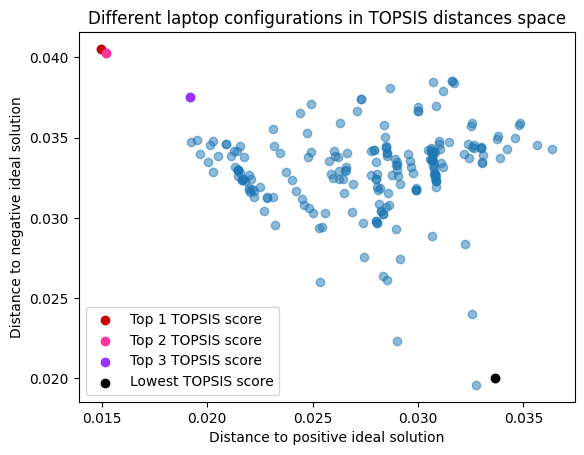

In [52]:
colors = ['#CC0000', '#FF3399', '#9933FF']

fig, ax = plt.subplots()
ax.scatter(D_pos, D_neg, alpha=0.5)
for i in range(1, 4):
    ax.scatter(D_pos.iloc[idxs[-i]], D_neg.iloc[idxs[-i]], color=colors[i-1], label=f'Top {i} TOPSIS score')
ax.scatter(D_pos.iloc[worst_alternative], D_neg.iloc[worst_alternative], color='k', label='Lowest TOPSIS score')
ax.set_xlabel('Distance to positive ideal solution')
ax.set_ylabel('Distance to negative ideal solution')
ax.set_title('Different laptop configurations in TOPSIS distances space')
ax.legend();

In [42]:
print(df.iloc[best_alternative]['descr_short'])
print(f'Price: {df.iloc[best_alternative]["price"]}')

15.6" Ноутбук Dream Machines RG3050Ti-15KZ34 черный [Full HD (1920x1080), WVA (TN+film), Intel Core i5-12500H, ядра: 4 + 8 х 2.5 ГГц, RAM 32 ГБ, SSD 1000 ГБ, GeForce RTX 3050 Ti для ноутбуков 4 ГБ, без ОС]
Price: 609990.0


### Modified TOPSIS Algorithm

Modified TOPSIS is similar to TOPSIS except the moment it uses weights. In original TOPSIS weights are applied to 

In [32]:
mod_pos_is = np.array([Y[col].max() if col_type == 'benefit' else Y[col].min() for col, col_type in performance_columns.items()])
mod_neg_is = np.array([Y[col].min() if col_type == 'benefit' else Y[col].max() for col, col_type in performance_columns.items()])
print('Positive ideal solution:', mod_pos_is)
print('Negative ideal solution:', mod_neg_is)

Positive ideal solution: [0.01319447 0.07768911 0.19096397 0.13059467 0.01710464 0.0062831
 0.13016296]
Negative ideal solution: [0.26391457 0.05972631 0.0238705  0.01632433 0.11118017 0.08796337
 0.04630276]


In [54]:
mod_D_pos = np.sqrt((W*(V - pos_is)**2).sum(axis=1))
mod_D_neg = np.sqrt((W*(V - neg_is)**2).sum(axis=1))
mod_S = mod_D_neg / (mod_D_pos + mod_D_neg)
mod_best_alternative = np.argmax(mod_S)
mod_worst_alternative = np.argmin(mod_S)
mod_idxs = np.argsort(mod_S.values)

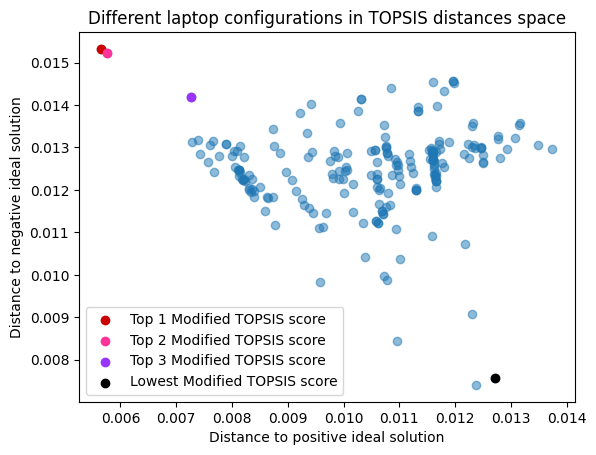

In [55]:
fig, ax = plt.subplots()
ax.scatter(mod_D_pos, mod_D_neg, alpha=0.5)
for i in range(1, 4):
    ax.scatter(mod_D_pos.iloc[mod_idxs[-i]], mod_D_neg.iloc[mod_idxs[-i]], color=colors[i-1], label=f'Top {i} Modified TOPSIS score')
ax.scatter(mod_D_pos.iloc[mod_worst_alternative], mod_D_neg.iloc[mod_worst_alternative], color='k', label='Lowest Modified TOPSIS score')
ax.set_xlabel('Distance to positive ideal solution')
ax.set_ylabel('Distance to negative ideal solution')
ax.set_title('Different laptop configurations in TOPSIS distances space')
ax.legend();

We see that relative positions of data points were not changed but now we have them in different coordinate values. Remember that we only changed the moment weights are applied.  
It might be interesting if relative positions will be influenced by switching algorithm from original TOPSIS to modified version in case when weights are not equal for features  